In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns',None)
# pd.set_option('display.max_rows',None)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
data_train = pd.read_csv('train.csv')
data_test = pd.read_csv('test.csv')

In [0]:
data_train_copy = data_train.copy(deep = True)
data_test_copy = data_test.copy(deep = True)

In [0]:
# data_train

## Eda

In [0]:
data_train

In [0]:
data_train.DEFCON_Level.value_counts()

B    4270
C    3910
D    1212
A     498
F     110
Name: DEFCON_Level, dtype: int64

In [0]:
data_train.DEFCON_Level.replace({'A': 1,'B':2,'C' :3,'D' : 4,'F': 5 }, inplace=True) # add main

In [0]:
sns.pairplot(data_train, hue = 'DEFCON_Level')

### null value imputaion

In [0]:
data_train.isnull().sum()

Allied_Nations                  0
Diplomatic_Meetings_Set         0
Percent_Of_Forces_Mobilized     0
Hostile_Nations                 0
Active_Threats                  0
Inactive_Threats                0
Citizen_Fear_Index              0
Closest_Threat_Distance(km)     0
Aircraft_Carriers_Responding    0
Troops_Mobilized(thousands)     0
DEFCON_Level                    0
ID                              0
dtype: int64

In [0]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Allied_Nations                10000 non-null  int64  
 1   Diplomatic_Meetings_Set       10000 non-null  int64  
 2   Percent_Of_Forces_Mobilized   10000 non-null  float64
 3   Hostile_Nations               10000 non-null  int64  
 4   Active_Threats                10000 non-null  float64
 5   Inactive_Threats              10000 non-null  float64
 6   Citizen_Fear_Index            10000 non-null  float64
 7   Closest_Threat_Distance(km)   10000 non-null  float64
 8   Aircraft_Carriers_Responding  10000 non-null  int64  
 9   Troops_Mobilized(thousands)   10000 non-null  float64
 10  DEFCON_Level                  10000 non-null  int64  
 11  ID                            10000 non-null  int64  
dtypes: float64(6), int64(6)
memory usage: 937.6 KB


### features

In [0]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Allied_Nations                10000 non-null  int64  
 1   Diplomatic_Meetings_Set       10000 non-null  int64  
 2   Percent_Of_Forces_Mobilized   10000 non-null  float64
 3   Hostile_Nations               10000 non-null  int64  
 4   Active_Threats                10000 non-null  float64
 5   Inactive_Threats              10000 non-null  float64
 6   Citizen_Fear_Index            10000 non-null  float64
 7   Closest_Threat_Distance(km)   10000 non-null  float64
 8   Aircraft_Carriers_Responding  10000 non-null  int64  
 9   Troops_Mobilized(thousands)   10000 non-null  float64
 10  DEFCON_Level                  10000 non-null  int64  
 11  ID                            10000 non-null  int64  
dtypes: float64(6), int64(6)
memory usage: 937.6 KB


In [0]:
data_train.head(25)

In [0]:
data_train.DEFCON_Level.value_counts(normalize=True) 

2    0.4270
3    0.3910
4    0.1212
1    0.0498
5    0.0110
Name: DEFCON_Level, dtype: float64

In [0]:
for col in data_train.columns:
    print(col)
    print(data_train[col].value_counts())
    print('- ' * 80)
    print(data_train.groupby(col)['DEFCON_Level'].value_counts(normalize = True))
    print('=' * 80)
    print()

Allied_Nations
8     2820
7     2498
9     1447
10    1052
6      872
12     475
11     451
5      179
13     144
14      28
16      27
15       7
Name: Allied_Nations, dtype: int64
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
Allied_Nations  DEFCON_Level
5               3               0.469274
                4               0.223464
                2               0.212291
                1               0.055866
                5               0.039106
6               3               0.472477
                2               0.355505
                4               0.097477
                1               0.063073
                5               0.011468
7               2               0.447558
                3               0.404724
                4               0.084868
                1               0.057246
                5               0.005604
8            

In [0]:
# object
Aircraft_Carriers_Responding     # changae astype
Diplomatic_Meetings_Set


In [0]:
# Remove
col = ID
remove : Diplomatic_Meetings_Set == 2
check : Aircraft_Carriers_Responding ==2

In [0]:
data_train.columns

Index(['Allied_Nations', 'Diplomatic_Meetings_Set',
       'Percent_Of_Forces_Mobilized', 'Hostile_Nations', 'Active_Threats',
       'Inactive_Threats', 'Citizen_Fear_Index', 'Closest_Threat_Distance(km)',
       'Aircraft_Carriers_Responding', 'Troops_Mobilized(thousands)',
       'DEFCON_Level', 'ID'],
      dtype='object')

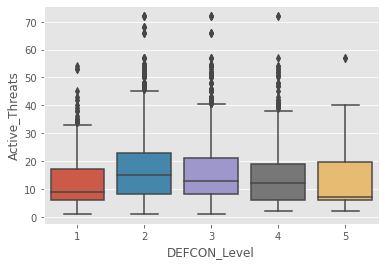

In [0]:
sns.boxplot(x="DEFCON_Level", y="Active_Threats", data=data_train)

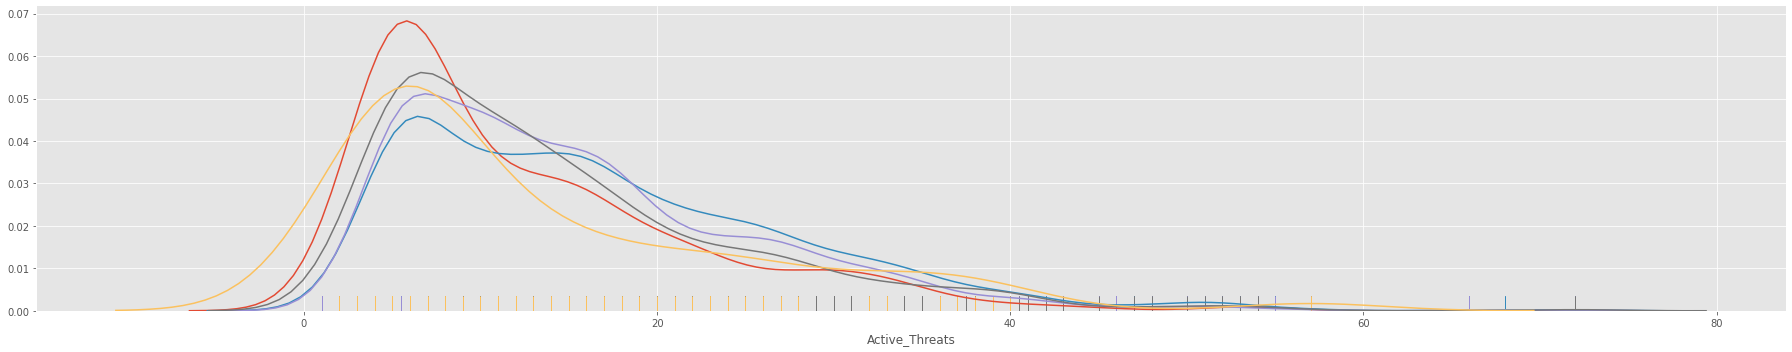

In [0]:
g = sns.FacetGrid(data_train, hue="DEFCON_Level", aspect=5,height=5)
pl = g.map(sns.distplot, "Active_Threats",  hist=False, rug=True)


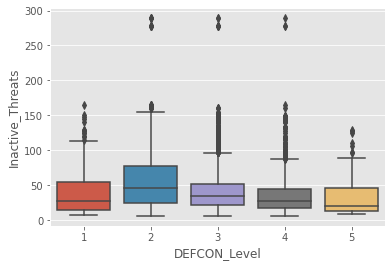

In [0]:
sns.boxplot(x="DEFCON_Level", y="Inactive_Threats", data=data_train)   

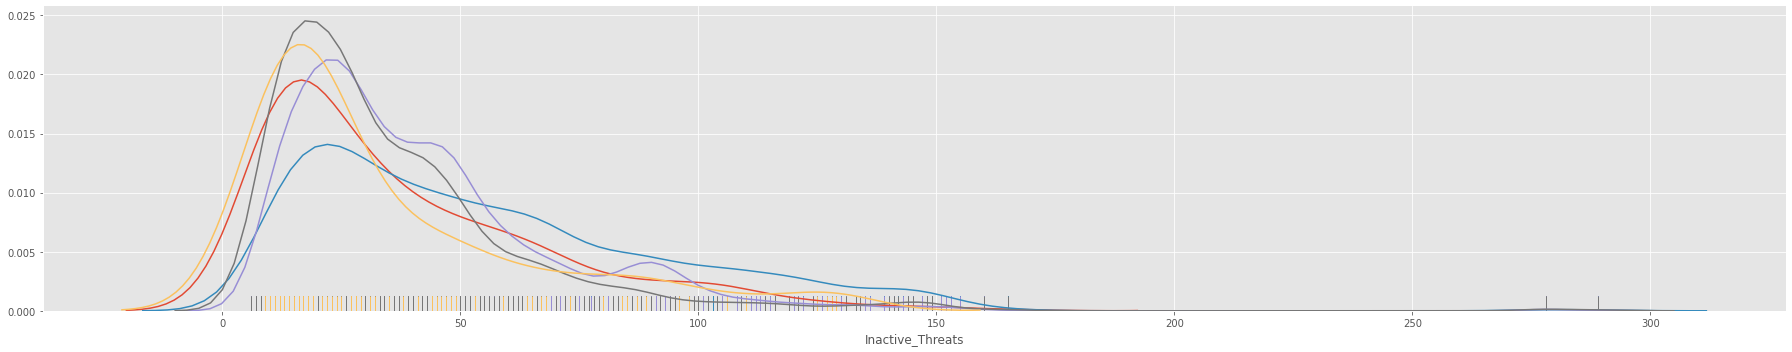

In [0]:
g = sns.FacetGrid(data_train, hue="DEFCON_Level", aspect=5,height=5)
pl2 = g.map(sns.distplot, "Inactive_Threats",  hist=False, rug=True)


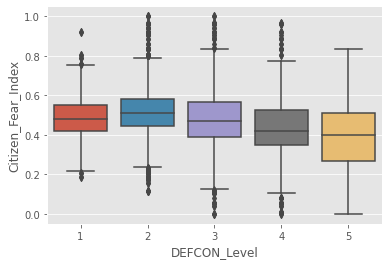

In [0]:
sns.boxplot(x="DEFCON_Level", y="Citizen_Fear_Index", data=data_train)   

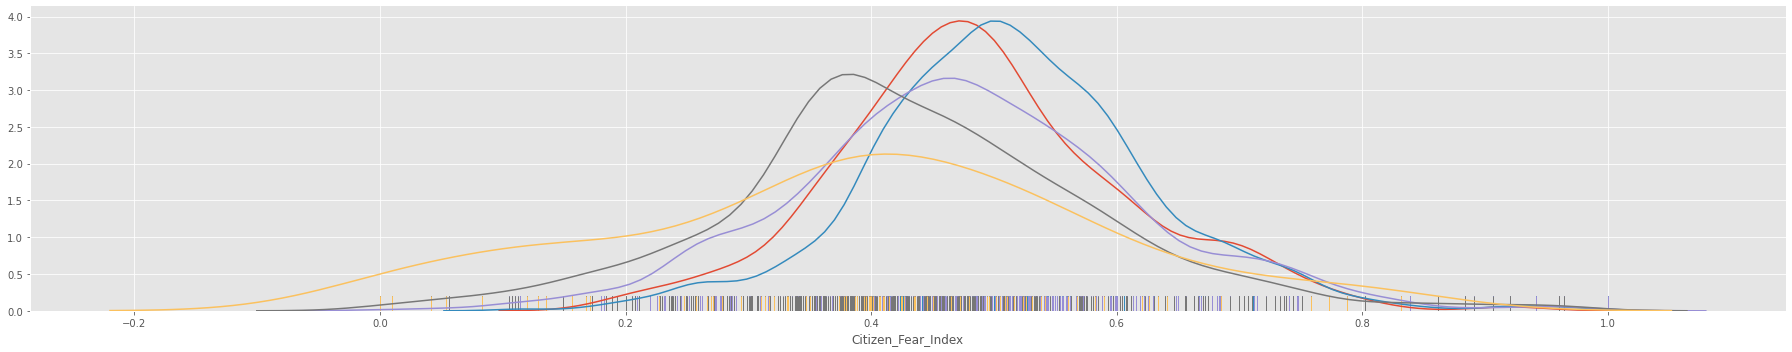

In [0]:
g = sns.FacetGrid(data_train, hue="DEFCON_Level", aspect=5,height=5)
pl2 = g.map(sns.distplot, "Citizen_Fear_Index",  hist=False, rug=True)


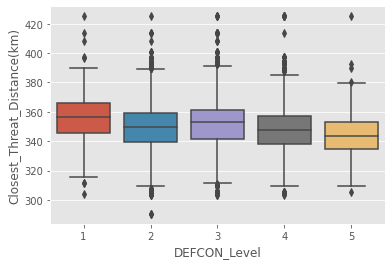

In [0]:
sns.boxplot(x="DEFCON_Level", y="Closest_Threat_Distance(km)", data=data_train)   

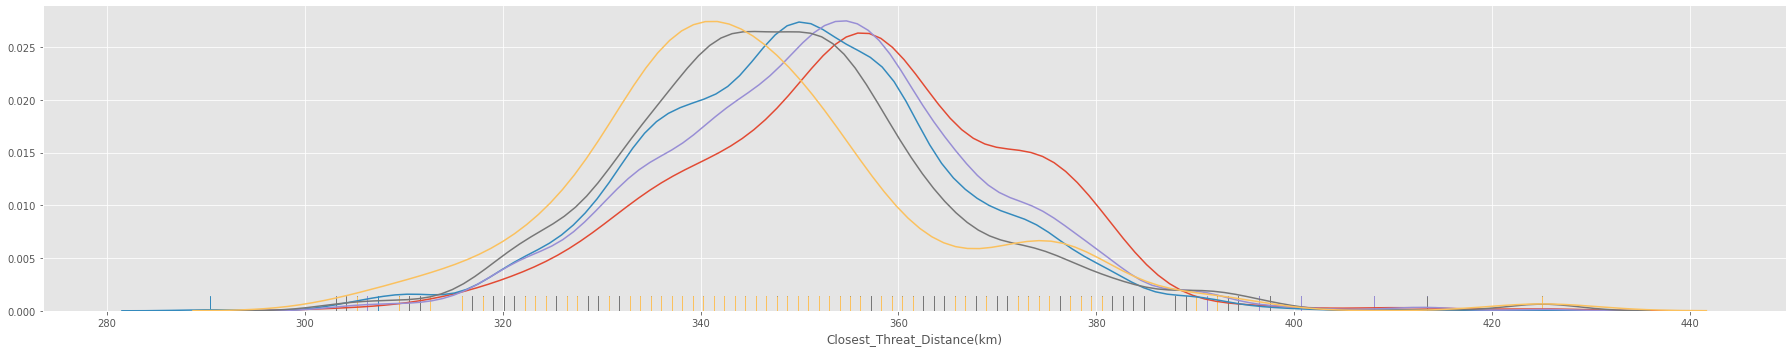

In [0]:
g = sns.FacetGrid(data_train, hue="DEFCON_Level", aspect=5,height=5)
pl2 = g.map(sns.distplot, "Closest_Threat_Distance(km)",  hist=False, rug=True)


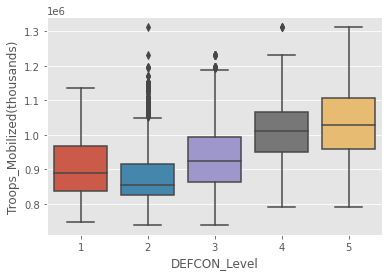

In [0]:
sns.boxplot(x="DEFCON_Level", y="Troops_Mobilized(thousands)", data=data_train)   

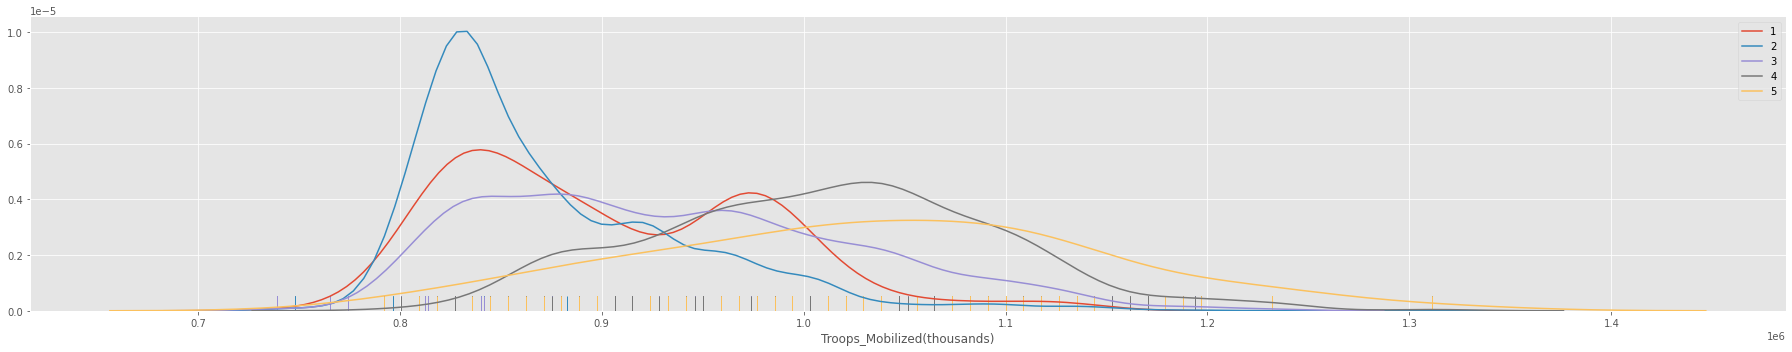

In [0]:
g = sns.FacetGrid(data_train, hue="DEFCON_Level", aspect=5,height=5)
pl2 = g.map(sns.distplot, "Troops_Mobilized(thousands)",  hist=False, rug=True)
plt.legend()

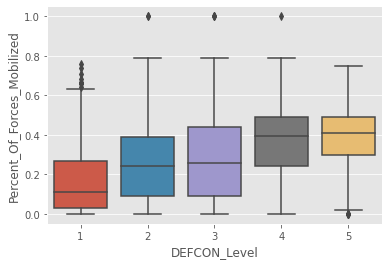

In [0]:
sns.boxplot(x="DEFCON_Level", y="Percent_Of_Forces_Mobilized", data=data_train)   

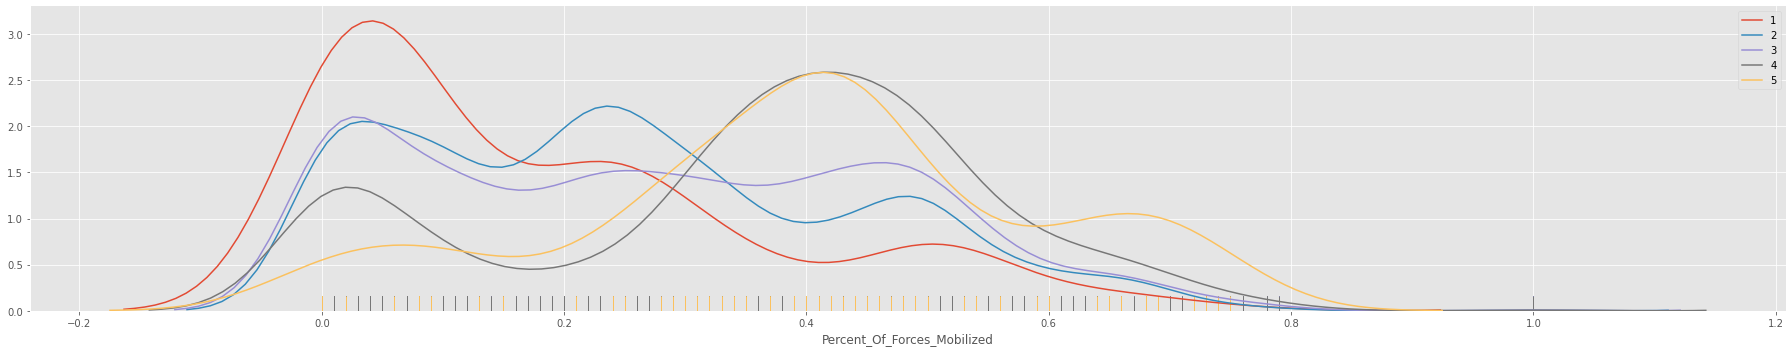

In [0]:
g = sns.FacetGrid(data_train, hue="DEFCON_Level", aspect=5,height=5)
pl2 = g.map(sns.distplot, "Percent_Of_Forces_Mobilized",  hist=False, rug=True)
plt.legend()

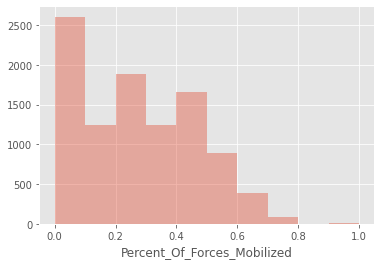

In [0]:
sns.distplot(data_train.Percent_Of_Forces_Mobilized,kde = False, bins = 10)

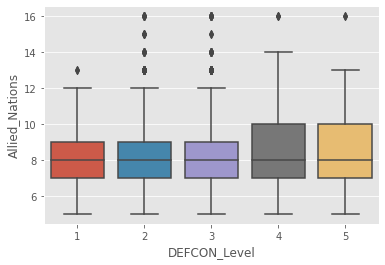

In [0]:
sns.boxplot(x="DEFCON_Level", y="Allied_Nations", data=data_train)   

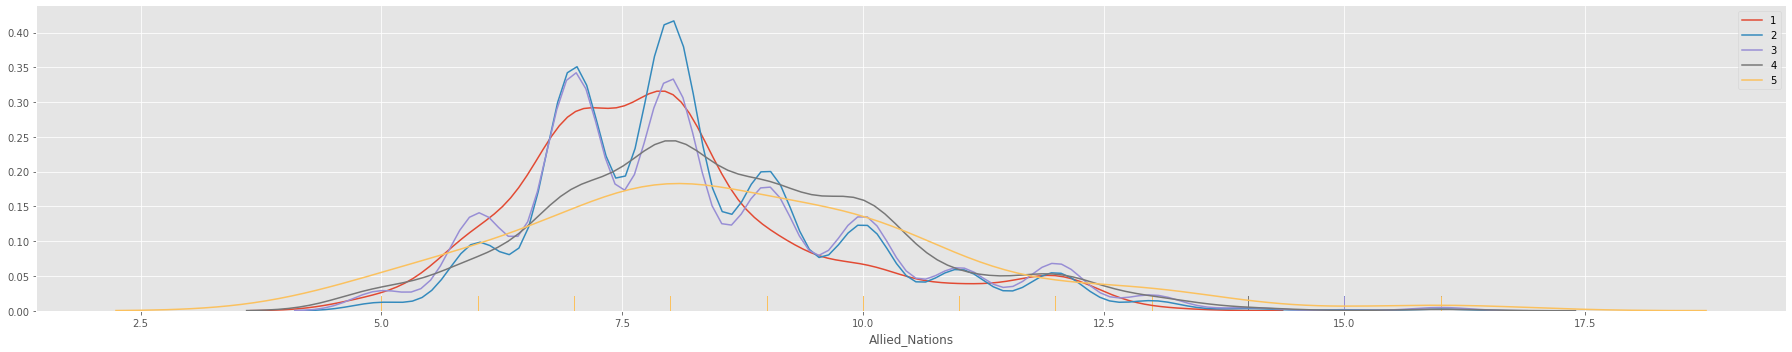

In [0]:
g = sns.FacetGrid(data_train, hue="DEFCON_Level", aspect=5,height=5)
pl2 = g.map(sns.distplot, "Allied_Nations",  hist=False, rug=True)
plt.legend()

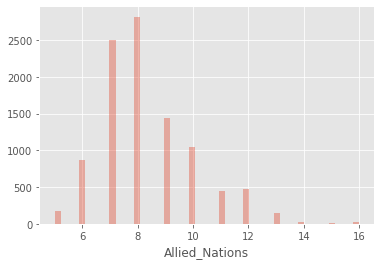

In [0]:
sns.distplot(data_train.Allied_Nations,kde = False)

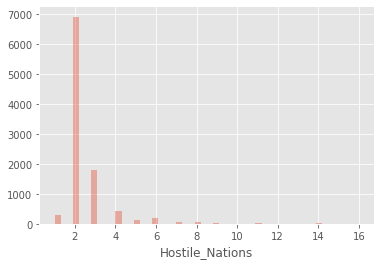

In [0]:
sns.distplot(data_train.Hostile_Nations,kde = False)

In [0]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

In [0]:
X = data_train.drop(columns='DEFCON_Level')

In [0]:
# X.info()

In [0]:
# X_le = label_enc(X)

In [0]:
# X_ty = X_le.astype('float64')

In [0]:
X = add_constant(X)
pd.Series([variance_inflation_factor(X.values, i) 
               for i in range(X.shape[1])], 
              index=X.columns)

const                           1268.480466
Allied_Nations                     4.325065
Diplomatic_Meetings_Set            1.648270
Percent_Of_Forces_Mobilized        2.981912
Hostile_Nations                    1.288281
Active_Threats                     1.921134
Inactive_Threats                   2.189070
Citizen_Fear_Index                 3.391547
Closest_Threat_Distance(km)        2.221769
Aircraft_Carriers_Responding       1.052452
Troops_Mobilized(thousands)        1.929308
ID                                 1.000796
actual_troops(thousands)           1.243922
dtype: float64

In [0]:
y_data = data_train.DEFCON_Level

In [0]:
import statsmodels.api as sm

In [0]:
model = sm.MNLogit(y_data, X)
model_fit = model.fit()

Optimization terminated successfully.
         Current function value: 1.007135
         Iterations 9


In [0]:
print(model_fit.summary())

                          MNLogit Regression Results                          
Dep. Variable:           DEFCON_Level   No. Observations:                10000
Model:                        MNLogit   Df Residuals:                     9952
Method:                           MLE   Df Model:                           44
Date:                Tue, 05 May 2020   Pseudo R-squ.:                  0.1503
Time:                        14:23:28   Log-Likelihood:                -10071.
converged:                       True   LL-Null:                       -11853.
Covariance Type:            nonrobust   LLR p-value:                     0.000
              DEFCON_Level=2       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                           11.3723      1.791      6.350      0.000       7.862      14.883
Allied_Nations                  -0.1143      0.063     -1.821      0.069     

In [0]:
# Hostile_Nations                 ,Allied_Nations                   shld take care of

In [0]:
# object
Aircraft_Carriers_Responding     # changae astype
Diplomatic_Meetings_Set


In [0]:
# Remove
col = ID
remove : Diplomatic_Meetings_Set == 2
check : Aircraft_Carriers_Responding ==2

In [0]:
data_train = data_train.drop(columns= ['ID'])   #add main

data_train['Aircraft_Carriers_Responding'] = data_train['Aircraft_Carriers_Responding'].astype('object')

data_train = data_train[data_train.Diplomatic_Meetings_Set != 2]
data_train['Diplomatic_Meetings_Set'] = data_train['Diplomatic_Meetings_Set'].astype('object')


In [0]:
# data_train['actual_troops(thousands)'] = [(data_train['Troops_Mobilized(thousands)'] / data_train['Percent_Of_Forces_Mobilized']) if data_train['Percent_Of_Forces_Mobilized'] > 0 else data_train['Troops_Mobilized(thousands)'] ]
data_train['actual_troops(thousands)'] = data_train['Troops_Mobilized(thousands)'] / data_train['Percent_Of_Forces_Mobilized']  #add main
data_train['actual_troops(thousands)'].replace(np.inf, data_train['Troops_Mobilized(thousands)'], inplace = True)

In [0]:
data_train[data_train.Aircraft_Carriers_Responding == 2]['DEFCON_Level'].value_counts() # cannot drop

2    29
3    18
4     7
1     3
Name: DEFCON_Level, dtype: int64

In [0]:
data_train.select_dtypes(exclude='object').columns

Index(['Allied_Nations', 'Percent_Of_Forces_Mobilized', 'Hostile_Nations',
       'Active_Threats', 'Inactive_Threats', 'Citizen_Fear_Index',
       'Closest_Threat_Distance(km)', 'Troops_Mobilized(thousands)',
       'DEFCON_Level', 'actual_troops(thousands)'],
      dtype='object')

In [0]:
data_train.select_dtypes('object').columns

Index(['Diplomatic_Meetings_Set', 'Aircraft_Carriers_Responding'], dtype='object')

###normalize

## func

In [0]:
def type_casting(data):
    df = data
    df['first_payment_date'] = pd.to_datetime(df.first_payment_date, format='%Y%m%d')
    df['origination_date'] = pd.to_datetime(df.origination_date, format='%Y%m%d')
#     df['test_type'] = df['test_type'].astype('object')
#     df['difficulty_level'] = df['difficulty_level'].astype('object')
    
    return(df)

def drop(data):
#     df = data.copy()
    df = data.drop(columns = ['loan_id','first_payment_date','origination_date'])
    
    return df

In [0]:
def label_enc(dataset):
    from sklearn.preprocessing import LabelEncoder
    df1 = dataset.copy()
    df_categorical = df1.select_dtypes(include=['object'])

    # apply Label encoder to df_categorical

    le = LabelEncoder()
    df_categorical = df_categorical.apply(le.fit_transform)
    df_categorical = df_categorical.astype('object')

    # concat df_categorical with original df AFTER LABEL ENCODING
    df1 = df1.drop(df_categorical.columns, axis=1)
    df1 = pd.concat([df1, df_categorical], axis=1)
    
    df_categorical =0
    return df1

def impute(data):
    from sklearn.impute import SimpleImputer
    
    si = SimpleImputer()
    array = si.fit_transform(data)
    
    return array
    

def standardize(dataset, X_test = None ,test = False):
    from sklearn.preprocessing import StandardScaler
    df1 = dataset.copy()
    df_num = df1.select_dtypes(include=['int64','float64','int32','float32'])
    # df_num = pd.DataFrame(impute(df_num), columns = df_num.columns,index = df1.index)

    se = StandardScaler()
    df_scaled = pd.DataFrame(se.fit_transform(df_num),columns = df_num.columns, index = df_num.index)
    
    df_new = df1.drop(df_num.columns,axis =1)
    df_new = pd.concat([df_scaled,df_new],axis =1)
    
    if test:
        df1 = X_test.copy()
        df_test_num = X_test.select_dtypes(include=['int64','float64','int32','float32'])
        df_test_num = pd.DataFrame(impute(df_test_num), columns = df_test_num.columns,index = df_test_num.index)
        
        df_scaled = pd.DataFrame(se.transform(df_test_num),columns = df_test_num.columns, index = df_test_num.index)
        
        df_new_ = df1.drop(df_test_num.columns,axis =1)
        df_new_ = pd.concat([df_new_,df_scaled],axis =1)
    else:
        df_new_ = 0
    
#     df_num ,df1,df_scaled = 0    
    return df_new,df_new_

def over_sample(X_train, y_train, smote = True):
    X_os = pd.DataFrame(impute(X_train), columns = X_train.columns,index = X_train.index)  #smote does not accept null values, impute returns array
    y_os = y_train.copy()

    from imblearn.over_sampling import SMOTE,ADASYN
    if smote:
        os = SMOTE(random_state=0)
        columns = X_os.columns

        X_train_os,y_train_os=os.fit_sample(X_os, y_os)
        X_train_os = pd.DataFrame(data=X_train_os,columns=columns ) # both index changes , i think we dont need to change index
    
    else:
        os = ADASYN(random_state=0)
        columns = X_os.columns

        X_train_os,y_train_os=os.fit_sample(X_os, y_os)
        X_train_os = pd.DataFrame(data=X_train_os,columns=columns )
        
        
    return X_train_os, y_train_os

def under_sample(X_train, y_train, random_under_sample = True,random_replacement = False ,ver = 1):
    X_us = pd.DataFrame(impute(X_train), columns = X_train.columns,index = X_train.index)  #smote does not accept null values, impute returns array
    y_us = y_train.copy()

    from imblearn.under_sampling import RandomUnderSampler,NearMiss
    if random_under_sample:
        us = RandomUnderSampler(random_state=0, replacement = random_replacement)
        columns = X_us.columns

        X_train_us,y_train_us=us.fit_sample(X_us, y_us)
        X_train_us = pd.DataFrame(data=X_train_us,columns=columns ) # both index changes , i think we dont need to change index
    
    else:
        us = NearMiss(version = ver)
        columns = X_us.columns

        X_train_us,y_train_us=us.fit_sample(X_us, y_us)
        X_train_us = pd.DataFrame(data=X_train_us,columns=columns )
        
        
    return X_train_us, y_train_us

In [0]:
def clf(model):
    from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,roc_curve,auc
    
    model = model()
    model.fit(X_train, y_train)

    y_predict = model.predict(X_val)
    print(confusion_matrix(y_val,y_predict)) 
    print(accuracy_score(y_val,y_predict))
    
    fpr, tpr, thresholds = roc_curve(y_val, y_predict, pos_label=None)
    print('auc :',auc(fpr, tpr))
    

In [0]:
def clf_tune(model):
    from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,roc_curve,auc
    
    model = model()
    model.fit(X_train, y_train)

    y_predict = model.predict(X_val)
    print(confusion_matrix(y_val,y_predict)) 
    print(accuracy_score(y_val,y_predict))
    
    fpr, tpr, thresholds = roc_curve(y_val, y_predict, pos_label=None)
    print('auc :',auc(fpr, tpr))
    

## model

### py

In [0]:
data_train.head()

,Allied_Nations,Diplomatic_Meetings_Set,Percent_Of_Forces_Mobilized,Hostile_Nations,Active_Threats,Inactive_Threats,Citizen_Fear_Index,Closest_Threat_Distance(km),Aircraft_Carriers_Responding,Troops_Mobilized(thousands),DEFCON_Level,actual_troops(thousands)
0,16,1,0.67,3,6.0,25.0,0.787812,324.36,1,862400.0,3,1.287164e+06
1,8,1,0.11,2,38.0,48.0,0.419236,359.34,0,959200.0,4,8.720000e+06
2,9,1,0.49,3,32.0,69.0,0.582232,332.84,1,836000.0,3,1.706122e+06
3,7,0,0.30,2,31.0,52.0,0.589574,358.28,1,924000.0,3,3.080000e+06
4,8,1,0.12,5,13.0,42.0,0.552863,364.64,0,968000.0,2,8.066667e+06


In [0]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9996 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Allied_Nations                9996 non-null   int64  
 1   Diplomatic_Meetings_Set       9996 non-null   object 
 2   Percent_Of_Forces_Mobilized   9996 non-null   float64
 3   Hostile_Nations               9996 non-null   int64  
 4   Active_Threats                9996 non-null   float64
 5   Inactive_Threats              9996 non-null   float64
 6   Citizen_Fear_Index            9996 non-null   float64
 7   Closest_Threat_Distance(km)   9996 non-null   float64
 8   Aircraft_Carriers_Responding  9996 non-null   object 
 9   Troops_Mobilized(thousands)   9996 non-null   float64
 10  DEFCON_Level                  9996 non-null   int64  
 11  actual_troops(thousands)      9996 non-null   float64
dtypes: float64(7), int64(3), object(2)
memory usage: 1015.2+ KB


In [0]:
pip install pycaret

In [0]:
from pycaret.classification import *

In [0]:
se = setup(data_train, target = 'DEFCON_Level',normalize = False,
           numeric_features = ['Allied_Nations', 'Percent_Of_Forces_Mobilized', 'Hostile_Nations','Active_Threats', 'Inactive_Threats', 'Citizen_Fear_Index',
       'Closest_Threat_Distance(km)', 'Troops_Mobilized(thousands)', 'actual_troops(thousands)'],
       categorical_features =['Diplomatic_Meetings_Set', 'Aircraft_Carriers_Responding'] )

 
Setup Succesfully Completed!


,Description,Value
0,session_id,8292
1,Target Type,Multiclass
2,Label Encoded,None
3,Original Data,"(9996, 12)"
4,Missing Values,False
5,Numeric Features,9
6,Categorical Features,2
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [0]:
compare_models(fold = 3)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,Light Gradient Boosting Machine,0.609500,0.000000,0.376300,0.595600,0.595500,0.371100
1,CatBoost Classifier,0.590800,0.000000,0.358400,0.578600,0.575600,0.338200
2,Extra Trees Classifier,0.586400,0.000000,0.354100,0.568500,0.571400,0.333500
3,Extreme Gradient Boosting,0.582500,0.000000,0.335500,0.574700,0.560700,0.315500
4,Gradient Boosting Classifier,0.578500,0.000000,0.341700,0.566900,0.558500,0.312200
5,Random Forest Classifier,0.577700,0.000000,0.354400,0.561800,0.564300,0.324800
6,Ada Boost Classifier,0.561000,0.000000,0.314100,0.554800,0.536600,0.279400
7,Linear Discriminant Analysis,0.547500,0.000000,0.293700,0.505400,0.515600,0.250000
8,Ridge Classifier,0.540800,0.000000,0.264900,0.499600,0.487800,0.222200
9,Naive Bayes,0.521400,0.000000,0.263500,0.462700,0.471400,0.195600


In [0]:
tune_model('rf')

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.6300,0.0,0.3693,0.6144,0.6095,0.4020
1,0.6214,0.0,0.3598,0.5989,0.5997,0.3829
2,0.6186,0.0,0.3765,0.6024,0.6025,0.3828
3,0.5757,0.0,0.3437,0.5565,0.5581,0.3129
4,0.6371,0.0,0.4030,0.6243,0.6195,0.4111
5,0.6286,0.0,0.3619,0.6022,0.6072,0.3973
6,0.6100,0.0,0.3579,0.5883,0.5921,0.3702
7,0.6209,0.0,0.3695,0.6074,0.6035,0.3851
8,0.6352,0.0,0.4146,0.6299,0.6259,0.4158
9,0.6080,0.0,0.3660,0.5895,0.5927,0.3678


OneVsRestClassifier(estimator=RandomForestClassifier(bootstrap=False,
                                                     ccp_alpha=0.0,
                                                     class_weight=None,
                                                     criterion='entropy',
                                                     max_depth=30,
                                                     max_features='log2',
                                                     max_leaf_nodes=None,
                                                     max_samples=None,
                                                     min_impurity_decrease=0.0,
                                                     min_impurity_split=None,
                                                     min_samples_leaf=4,
                                                     min_samples_split=9,
                                                     min_weight_fraction_leaf=0.0,
                                          

In [0]:
tune_model('dt')

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.5814,0.0,0.3953,0.5622,0.5691,0.3340
1,0.6014,0.0,0.4084,0.5939,0.5933,0.3651
2,0.5629,0.0,0.3680,0.5540,0.5572,0.3103
3,0.5671,0.0,0.3480,0.5554,0.5559,0.3063
4,0.5929,0.0,0.4180,0.5843,0.5862,0.3559
5,0.5900,0.0,0.3563,0.5675,0.5726,0.3412
6,0.5943,0.0,0.3896,0.5876,0.5855,0.3544
7,0.5765,0.0,0.3871,0.5686,0.5703,0.3285
8,0.5680,0.0,0.3565,0.5627,0.5623,0.3167
9,0.5794,0.0,0.3812,0.5661,0.5709,0.3363


OneVsRestClassifier(estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                     class_weight=None,
                                                     criterion='entropy',
                                                     max_depth=9,
                                                     max_features=9,
                                                     max_leaf_nodes=None,
                                                     min_impurity_decrease=0.0,
                                                     min_impurity_split=None,
                                                     min_samples_leaf=2,
                                                     min_samples_split=2,
                                                     min_weight_fraction_leaf=0.0,
                                                     presort='deprecated',
                                                     random_state=8292,
                                          

In [0]:
tune_model('lr')

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.4357,0.0,0.2056,0.3509,0.3149,0.0204
1,0.4357,0.0,0.2056,0.3729,0.3143,0.0197
2,0.4386,0.0,0.2074,0.3830,0.3268,0.0256
3,0.4271,0.0,0.2017,0.3392,0.2952,0.0063
4,0.4514,0.0,0.2400,0.4154,0.3540,0.0720
5,0.4286,0.0,0.2026,0.3481,0.3166,0.0090
6,0.4300,0.0,0.2033,0.3496,0.3190,0.0117
7,0.4292,0.0,0.2023,0.3444,0.3095,0.0081
8,0.4220,0.0,0.1988,0.3296,0.3021,-0.0043
9,0.4435,0.0,0.2089,0.4045,0.3155,0.0314


OneVsRestClassifier(estimator=LogisticRegression(C=3.266, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='auto',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=8292,
                                                 solver='lbfgs', tol=0.0001,
                                                 verbose=0, warm_start=False),
                    n_jobs=None)

In [0]:
tune_model('xgboost')

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.6171,0.0,0.4004,0.5946,0.6034,0.3928
1,0.6114,0.0,0.3814,0.5925,0.5994,0.3807
2,0.6129,0.0,0.4059,0.6032,0.6056,0.3898
3,0.5671,0.0,0.3791,0.5533,0.5575,0.3133
4,0.6357,0.0,0.4554,0.6184,0.6227,0.4193
5,0.6114,0.0,0.3762,0.5912,0.5976,0.3792
6,0.5871,0.0,0.3699,0.5756,0.5783,0.3432
7,0.6037,0.0,0.3889,0.5924,0.5941,0.3667
8,0.6366,0.0,0.4548,0.6300,0.6304,0.4240
9,0.6052,0.0,0.3985,0.5876,0.5926,0.3693


OneVsRestClassifier(estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                            colsample_bylevel=1,
                                            colsample_bynode=1,
                                            colsample_bytree=1, gamma=0,
                                            learning_rate=0.13,
                                            max_delta_step=0, max_depth=110,
                                            min_child_weight=3, missing=None,
                                            n_estimators=470, n_jobs=-1,
                                            nthread=None, num_class=5,
                                            objective='multi:softprob',
                                            random_state=8292, reg_alpha=0,
                                            reg_lambda=1, scale_pos_weight=1,
                                            seed=None, silent=None, subsample=1,
                                            verbos

In [0]:
tune_model('lightgbm')

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.6343,0.0,0.3811,0.6095,0.6165,0.4148
1,0.6457,0.0,0.4085,0.6295,0.6322,0.4315
2,0.6314,0.0,0.4161,0.6168,0.6199,0.4141
3,0.5943,0.0,0.3659,0.5746,0.5792,0.3480
4,0.6214,0.0,0.4031,0.6044,0.6067,0.3922
5,0.6129,0.0,0.3703,0.5920,0.5980,0.3800
6,0.6014,0.0,0.3734,0.5845,0.5904,0.3656
7,0.6109,0.0,0.3773,0.5979,0.5975,0.3736
8,0.6423,0.0,0.4278,0.6351,0.6343,0.4304
9,0.6080,0.0,0.3672,0.5851,0.5929,0.3712


OneVsRestClassifier(estimator=LGBMClassifier(boosting_type='gbdt',
                                             class_weight=None,
                                             colsample_bytree=1.0,
                                             importance_type='split',
                                             learning_rate=0.1, max_depth=40,
                                             min_child_samples=20,
                                             min_child_weight=0.001,
                                             min_split_gain=0, n_estimators=150,
                                             n_jobs=-1, num_leaves=70,
                                             objective=None, random_state=8292,
                                             reg_alpha=0.6, reg_lambda=0.6,
                                             silent=True, subsample=1.0,
                                             subsample_for_bin=200000,
                                             subsample_freq=0),
  

In [0]:
tune_model('catboost')

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.6057,0.0,0.3638,0.5876,0.5894,0.3694
1,0.6171,0.0,0.4086,0.6090,0.6062,0.3885
2,0.6329,0.0,0.4085,0.6202,0.6202,0.4158
3,0.5871,0.0,0.3760,0.5759,0.5750,0.3378
4,0.5929,0.0,0.3761,0.5753,0.5776,0.3448
5,0.6014,0.0,0.3683,0.5842,0.5870,0.3595
6,0.5771,0.0,0.3588,0.5646,0.5666,0.3252
7,0.6094,0.0,0.3917,0.5996,0.5993,0.3744
8,0.5966,0.0,0.3924,0.5928,0.5892,0.3576
9,0.6094,0.0,0.3647,0.5895,0.5934,0.3714


OneVsRestClassifier(estimator=<catboost.core.CatBoostClassifier object at 0x7f1877dbfac8>,
                    n_jobs=None)

In [0]:
tune_model('knn')

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.5300,0.0,0.3084,0.5109,0.5142,0.2437
1,0.5071,0.0,0.2941,0.4872,0.4905,0.2022
2,0.5043,0.0,0.2856,0.4760,0.4867,0.1954
3,0.4714,0.0,0.2876,0.4568,0.4589,0.1508
4,0.5486,0.0,0.3217,0.5127,0.5294,0.2739
5,0.5343,0.0,0.3031,0.4998,0.5137,0.2438
6,0.5529,0.0,0.3212,0.5645,0.5356,0.2784
7,0.5236,0.0,0.3233,0.5127,0.5128,0.2370
8,0.4979,0.0,0.3093,0.5022,0.4889,0.1956
9,0.5236,0.0,0.3013,0.4904,0.5051,0.2293


OneVsRestClassifier(estimator=KNeighborsClassifier(algorithm='auto',
                                                   leaf_size=30,
                                                   metric='manhattan',
                                                   metric_params=None,
                                                   n_jobs=None, n_neighbors=10,
                                                   p=2, weights='uniform'),
                    n_jobs=None)

In [0]:
se = setup(data_train, target = 'DEFCON_Level',normalize = True,silent = True,
           numeric_features = ['Allied_Nations', 'Percent_Of_Forces_Mobilized', 'Hostile_Nations','Active_Threats', 'Inactive_Threats', 'Citizen_Fear_Index',
       'Closest_Threat_Distance(km)', 'Troops_Mobilized(thousands)', 'actual_troops(thousands)'],
       categorical_features =['Diplomatic_Meetings_Set', 'Aircraft_Carriers_Responding'] )

 
Setup Succesfully Completed!


,Description,Value
0,session_id,7200
1,Target Type,Multiclass
2,Label Encoded,None
3,Original Data,"(9996, 12)"
4,Missing Values,False
5,Numeric Features,9
6,Categorical Features,2
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [0]:
tune_model('lightgbm')

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.6000,0.0,0.3514,0.5738,0.5851,0.3627
1,0.6171,0.0,0.4228,0.6043,0.6079,0.3942
2,0.5671,0.0,0.3415,0.5467,0.5538,0.3064
3,0.6043,0.0,0.3897,0.5898,0.5928,0.3671
4,0.6043,0.0,0.3662,0.5843,0.5904,0.3666
5,0.6043,0.0,0.3739,0.5879,0.5896,0.3638
6,0.6000,0.0,0.3951,0.5885,0.5888,0.3631
7,0.6209,0.0,0.3868,0.6069,0.6091,0.3950
8,0.6180,0.0,0.3745,0.6019,0.6056,0.3887
9,0.6352,0.0,0.4416,0.6254,0.6214,0.4105


OneVsRestClassifier(estimator=LGBMClassifier(boosting_type='gbdt',
                                             class_weight=None,
                                             colsample_bytree=1.0,
                                             importance_type='split',
                                             learning_rate=0.4, max_depth=110,
                                             min_child_samples=20,
                                             min_child_weight=0.001,
                                             min_split_gain=0.3,
                                             n_estimators=10, n_jobs=-1,
                                             num_leaves=200, objective=None,
                                             random_state=7200, reg_alpha=0.3,
                                             reg_lambda=0.4, silent=True,
                                             subsample=1.0,
                                             subsample_for_bin=200000,
                  

In [0]:
tune_model('catboost', fold = 3)

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.5769,0.0,0.3238,0.5478,0.5529,0.3074
1,0.5772,0.0,0.3327,0.5585,0.5550,0.3088
2,0.5849,0.0,0.3253,0.5755,0.5600,0.3186
Mean,0.5797,0.0,0.3272,0.5606,0.5560,0.3116
SD,0.0037,0.0,0.0039,0.0114,0.0030,0.0050


OneVsRestClassifier(estimator=<catboost.core.CatBoostClassifier object at 0x7f1877de3630>,
                    n_jobs=None)

In [0]:
se = setup(data_train, target = 'DEFCON_Level',normalize = True,silent = True, transformation = True,
           numeric_features = ['Allied_Nations', 'Percent_Of_Forces_Mobilized', 'Hostile_Nations','Active_Threats', 'Inactive_Threats', 'Citizen_Fear_Index',
       'Closest_Threat_Distance(km)', 'Troops_Mobilized(thousands)', 'actual_troops(thousands)'],
       categorical_features =['Diplomatic_Meetings_Set', 'Aircraft_Carriers_Responding'] )

 
Setup Succesfully Completed!


,Description,Value
0,session_id,3538
1,Target Type,Multiclass
2,Label Encoded,None
3,Original Data,"(9996, 12)"
4,Missing Values,False
5,Numeric Features,9
6,Categorical Features,2
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [0]:
tune_model('lightgbm')

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.6157,0.0,0.3942,0.6019,0.6063,0.3907
1,0.5843,0.0,0.3619,0.5689,0.5745,0.3392
2,0.6171,0.0,0.3867,0.5981,0.6016,0.3864
3,0.6157,0.0,0.3686,0.5964,0.6017,0.3831
4,0.6257,0.0,0.4098,0.6189,0.6147,0.3992
5,0.6157,0.0,0.3702,0.5934,0.6004,0.3837
6,0.6014,0.0,0.3519,0.5818,0.5862,0.3602
7,0.6266,0.0,0.3597,0.5993,0.6072,0.3961
8,0.6109,0.0,0.4096,0.5979,0.5990,0.3774
9,0.6323,0.0,0.3829,0.6119,0.6167,0.4076


OneVsRestClassifier(estimator=LGBMClassifier(boosting_type='gbdt',
                                             class_weight=None,
                                             colsample_bytree=1.0,
                                             importance_type='split',
                                             learning_rate=0.4, max_depth=80,
                                             min_child_samples=20,
                                             min_child_weight=0.001,
                                             min_split_gain=0.4,
                                             n_estimators=100, n_jobs=-1,
                                             num_leaves=90, objective=None,
                                             random_state=3538, reg_alpha=0.6,
                                             reg_lambda=0.6, silent=True,
                                             subsample=1.0,
                                             subsample_for_bin=200000,
                   

In [0]:
tune_model('catboost',fold = 3)

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.5941,0.0,0.3605,0.5782,0.5775,0.3453
1,0.5931,0.0,0.3470,0.5763,0.5735,0.3375
2,0.6166,0.0,0.3546,0.5975,0.5934,0.3721
Mean,0.6013,0.0,0.3540,0.5840,0.5814,0.3516
SD,0.0109,0.0,0.0055,0.0096,0.0086,0.0148


OneVsRestClassifier(estimator=<catboost.core.CatBoostClassifier object at 0x7f18641bb2b0>,
                    n_jobs=None)

In [0]:
se = setup(data_train, target = 'DEFCON_Level',normalize = True,silent = False, transformation = False )

 
Setup Succesfully Completed!


,Description,Value
0,session_id,8292
1,Target Type,Multiclass
2,Label Encoded,None
3,Original Data,"(9996, 12)"
4,Missing Values,False
5,Numeric Features,7
6,Categorical Features,4
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [0]:
tune_model('dt')

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.5857,0.0,0.3799,0.5702,0.5733,0.3381
1,0.5957,0.0,0.3472,0.5707,0.5784,0.3479
2,0.5957,0.0,0.3637,0.5771,0.5821,0.3503
3,0.5529,0.0,0.3440,0.5386,0.5389,0.2795
4,0.5986,0.0,0.3694,0.5789,0.5839,0.3564
5,0.6100,0.0,0.3612,0.5881,0.5952,0.3757
6,0.5829,0.0,0.3644,0.5689,0.5748,0.3421
7,0.6052,0.0,0.3781,0.5910,0.5947,0.3700
8,0.5923,0.0,0.4249,0.5871,0.5885,0.3594
9,0.5951,0.0,0.3697,0.5790,0.5848,0.3562


OneVsRestClassifier(estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                     class_weight=None,
                                                     criterion='gini',
                                                     max_depth=8,
                                                     max_features=34,
                                                     max_leaf_nodes=None,
                                                     min_impurity_decrease=0.0,
                                                     min_impurity_split=None,
                                                     min_samples_leaf=6,
                                                     min_samples_split=2,
                                                     min_weight_fraction_leaf=0.0,
                                                     presort='deprecated',
                                                     random_state=8292,
                                            

In [0]:
tune_model('lr')

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.5900,0.0,0.5669,0.5955,0.5923,0.4472
1,0.6014,0.0,0.5784,0.6036,0.6024,0.4622
2,0.6000,0.0,0.5678,0.5922,0.5952,0.4569
3,0.6271,0.0,0.5975,0.6220,0.6241,0.4949
4,0.6129,0.0,0.5917,0.6208,0.6157,0.4779
5,0.6257,0.0,0.6019,0.6277,0.6265,0.4948
6,0.6043,0.0,0.5763,0.5993,0.6011,0.4635
7,0.6000,0.0,0.5654,0.5918,0.5947,0.4566
8,0.6157,0.0,0.5905,0.6177,0.6157,0.4799
9,0.5880,0.0,0.5656,0.5900,0.5889,0.4434


OneVsRestClassifier(estimator=LogisticRegression(C=1.571,
                                                 class_weight='balanced',
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='auto',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=8156,
                                                 solver='lbfgs', tol=0.0001,
                                                 verbose=0, warm_start=False),
                    n_jobs=None)

In [0]:
tune_model('lightgbm')

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.6329,0.0,0.3755,0.6114,0.6144,0.4109
1,0.6286,0.0,0.3917,0.6098,0.6145,0.4032
2,0.6214,0.0,0.3943,0.6022,0.6074,0.3960
3,0.5971,0.0,0.3709,0.5779,0.5828,0.3535
4,0.6157,0.0,0.3986,0.5991,0.6008,0.3829
5,0.6114,0.0,0.3649,0.5885,0.5955,0.3765
6,0.5986,0.0,0.3654,0.5818,0.5865,0.3582
7,0.6080,0.0,0.3846,0.5958,0.5973,0.3721
8,0.6395,0.0,0.4231,0.6306,0.6317,0.4265
9,0.6137,0.0,0.3701,0.5918,0.5991,0.3811


OneVsRestClassifier(estimator=LGBMClassifier(boosting_type='gbdt',
                                             class_weight=None,
                                             colsample_bytree=1.0,
                                             importance_type='split',
                                             learning_rate=0.1, max_depth=40,
                                             min_child_samples=20,
                                             min_child_weight=0.001,
                                             min_split_gain=0, n_estimators=150,
                                             n_jobs=-1, num_leaves=70,
                                             objective=None, random_state=8292,
                                             reg_alpha=0.6, reg_lambda=0.6,
                                             silent=True, subsample=1.0,
                                             subsample_for_bin=200000,
                                             subsample_freq=0),
  

### sampling --- cannot

In [0]:
data_train.DEFCON_Level.value_counts()

2    4270
3    3906
4    1212
1     498
5     110
Name: DEFCON_Level, dtype: int64

In [0]:
def over_sample(X_train, y_train, smote = True):
    # X_os = pd.DataFrame(impute(X_train), columns = X_train.columns,index = X_train.index)  #smote does not accept null values, impute returns array
    X_os = X_train.copy()
    y_os = y_train.copy()

    from imblearn.over_sampling import SMOTE,ADASYN
    if smote:
        os = SMOTE(random_state=0)
        columns = X_os.columns

        X_train_os,y_train_os=os.fit_sample(X_os, y_os)
        X_train_os = pd.DataFrame(data=X_train_os,columns=columns ) # both index changes , i think we dont need to change index
    
    else:
        os = ADASYN(random_state=0)
        columns = X_os.columns

        X_train_os,y_train_os=os.fit_sample(X_os, y_os)
        X_train_os = pd.DataFrame(data=X_train_os,columns=columns )
        
        
    return X_train_os, y_train_os

def under_sample(X_train, y_train, random_under_sample = True,random_replacement = False ,ver = 1):
    # X_us = pd.DataFrame(impute(X_train), columns = X_train.columns,index = X_train.index)  #smote does not accept null values, impute returns array
    X_us = X_train.copy()
    y_us = y_train.copy()

    from imblearn.under_sampling import RandomUnderSampler,NearMiss
    if random_under_sample:
        us = RandomUnderSampler(random_state=0, replacement = random_replacement)
        columns = X_us.columns

        X_train_us,y_train_us=us.fit_sample(X_us, y_us)
        X_train_us = pd.DataFrame(data=X_train_us,columns=columns ) # both index changes , i think we dont need to change index
    
    else:
        us = NearMiss(version = ver)
        columns = X_us.columns

        X_train_us,y_train_us=us.fit_sample(X_us, y_us)
        X_train_us = pd.DataFrame(data=X_train_us,columns=columns )
        
        
    return X_train_us, y_train_us

In [0]:
X =data_train.drop(columns='DEFCON_Level')
y = data_train.DEFCON_Level

In [0]:
X_train, X_val , y_train, y_val = train_test_split(X,y ,random_state = 6, stratify = y, train_size = .8)

In [0]:
X_train.shape  ,y_train.shape

((7996, 11), (7996,))

under_sample

In [0]:
X_train_us, y_train_us = under_sample(X_train= X, y_train= y)

In [0]:
y_train_us.shape ,X_train_us.shape

((550,), (550, 11))

over_sample

In [0]:
X1 =data_train.drop(columns='DEFCON_Level')
y1 = data_train.DEFCON_Level

In [0]:
X_train_os, y_train_os = over_sample(X_train= X1, y_train= y1)

In [0]:
y_train_us.shape ,X_train_us.shape

((550,), (550, 11))

### ml

In [0]:
data_train.head(5)

#### with raw data

#####other than lr

In [0]:
data_raw = pd.get_dummies(data_train )   ## add main

In [0]:
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier,AdaBoostClassifier
from xgboost import XGBRFClassifier,XGBClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,roc_curve,auc,recall_score,classification_report

In [0]:
X = data_raw.drop(columns=['DEFCON_Level']).values
y = data_raw.DEFCON_Level.values

In [0]:
X_train, X_val, y_train, y_val = train_test_split(X,y, random_state = 6, train_size = .8, stratify = y)

In [0]:
def clf_base(model1):
    from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,roc_curve,auc,recall_score,classification_report
    
    mod = model1()
    mod.fit(X_train, y_train)

    y_predict = mod.predict(X_val)
    print(confusion_matrix(y_val,y_predict)) 
    print(accuracy_score(y_val,y_predict))

    print(classification_report(y_val,y_predict))    
    # fpr, tpr, thresholds = roc_curve(y_val, y_predict, pos_label=None)
    # print('auc :',auc(fpr, tpr))
    # print('recall :', recall_score(y_val, y_predict))

DecisionTreeClassifier

In [0]:
clf_base(DecisionTreeClassifier)

[[ 26  52  19   3   0]
 [ 57 571 203  21   2]
 [ 28 229 408 109   8]
 [  3  20  88 113  18]
 [  0   0   7   9   6]]
0.562
              precision    recall  f1-score   support

           1       0.23      0.26      0.24       100
           2       0.65      0.67      0.66       854
           3       0.56      0.52      0.54       782
           4       0.44      0.47      0.45       242
           5       0.18      0.27      0.21        22

    accuracy                           0.56      2000
   macro avg       0.41      0.44      0.42      2000
weighted avg       0.57      0.56      0.56      2000



In [0]:
model = DecisionTreeClassifier(ccp_alpha=0.0,class_weight=None,
                                                     criterion='entropy',
                                                     max_depth=9,
                                                     max_features=9,
                                                     max_leaf_nodes=None,
                                                     min_impurity_decrease=0.0,
                                                     min_impurity_split=None,
                                                     min_samples_leaf=2,
                                                     min_samples_split=2,
                                                     min_weight_fraction_leaf=0.0,
                                                     presort='deprecated',
                                                     random_state=8292,
                                                     splitter='best')

model.fit(X_train, y_train)

y_predict = model.predict(X_val)
print(confusion_matrix(y_val,y_predict)) 
print(accuracy_score(y_val,y_predict))
print(classification_report(y_val,y_predict))


[[ 27  61  10   1   1]
 [ 31 640 173   7   3]
 [ 15 272 443  50   2]
 [  2  19 121  94   6]
 [  0   1   9  11   1]]
0.6025
              precision    recall  f1-score   support

           1       0.36      0.27      0.31       100
           2       0.64      0.75      0.69       854
           3       0.59      0.57      0.58       782
           4       0.58      0.39      0.46       242
           5       0.08      0.05      0.06        22

    accuracy                           0.60      2000
   macro avg       0.45      0.40      0.42      2000
weighted avg       0.59      0.60      0.59      2000



In [0]:
params = dict(
              max_features=[8,9,10,11,None],
              max_depth=[5,10,9,12,15,20,None],
              min_samples_split=[2,5,7],
              min_samples_leaf=[5,10]
              )

clf = DecisionTreeClassifier(criterion = 'entropy',
              random_state=8292)

model = GridSearchCV(clf, param_grid= params,scoring='accuracy', n_jobs=-1, verbose= 1, cv = 5 ,return_train_score=False)
model.fit(X_train,y_train)

Fitting 5 folds for each of 210 candidates, totalling 1050 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 300 tasks      | elapsed:    5.8s
[Parallel(n_jobs=-1)]: Done 1050 out of 1050 | elapsed:   25.8s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='entropy',
                                              max_depth=None, max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=8292,
                                              splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid={'max_depth': [5, 10, 9, 12, 15, 20, None],
         

In [0]:
# model.cv_results_ 

In [0]:
model.best_score_, model.best_params_

(0.6256883989993746,
 {'max_depth': 10,
  'max_features': None,
  'min_samples_leaf': 10,
  'min_samples_split': 2})

In [0]:
model = DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',           
                       max_depth=11, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=0.05,
                       min_samples_leaf=10, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=8292, splitter='best')


model.fit(X_train, y_train)

y_predict = model.predict(X_val)
print(confusion_matrix(y_val,y_predict)) 
print(accuracy_score(y_val,y_predict))
print(classification_report(y_val,y_predict))


[[ 29  62   7   2   0]
 [ 30 628 193   3   0]
 [ 12 219 476  72   3]
 [  2  12  99 126   3]
 [  0   0   7  12   3]]
0.631
              precision    recall  f1-score   support

           1       0.40      0.29      0.34       100
           2       0.68      0.74      0.71       854
           3       0.61      0.61      0.61       782
           4       0.59      0.52      0.55       242
           5       0.33      0.14      0.19        22

    accuracy                           0.63      2000
   macro avg       0.52      0.46      0.48      2000
weighted avg       0.62      0.63      0.63      2000



RandomForestClassifier

In [0]:
clf_base(RandomForestClassifier)

[[  8  69  22   1   0]
 [ 14 633 200   7   0]
 [  2 228 494  58   0]
 [  2  17 132  88   3]
 [  0   1  10  10   1]]
0.612
              precision    recall  f1-score   support

           1       0.31      0.08      0.13       100
           2       0.67      0.74      0.70       854
           3       0.58      0.63      0.60       782
           4       0.54      0.36      0.43       242
           5       0.25      0.05      0.08        22

    accuracy                           0.61      2000
   macro avg       0.47      0.37      0.39      2000
weighted avg       0.59      0.61      0.60      2000



In [0]:
model =RandomForestClassifier(bootstrap=False,ccp_alpha=0.0,
                                                     class_weight=None,
                                                     criterion='entropy',
                                                     max_depth=30,
                                                     max_features='log2',
                                                     max_leaf_nodes=None,
                                                     max_samples=None,
                                                     min_impurity_decrease=0.0,
                                                     min_impurity_split=None,
                                                     min_samples_leaf=4,
                                                     min_samples_split=9,
                                                     min_weight_fraction_leaf=0.0,
                                                     n_estimators=90,
                                                     n_jobs=None,
                                                     oob_score=False,
                                                     random_state=8292,
                                                     verbose=0,
                                                     warm_start=False)

model.fit(X_train, y_train)

y_predict = model.predict(X_val)
print(confusion_matrix(y_val,y_predict)) 
print(accuracy_score(y_val,y_predict))
    

[[ 11  68  20   1   0]
 [  7 647 195   5   0]
 [  2 220 511  49   0]
 [  0  14 139  88   1]
 [  0   1  10  11   0]]
0.6285


In [0]:
params = dict(
              max_features=[15,'sqrt','log2',None],
              max_depth=[20,15,30,40,None]
             
              )

clf = RandomForestClassifier(min_samples_split=9,min_samples_leaf=4,n_estimators = 100,n_jobs=-1,criterion = 'entropy',
              random_state=8292)

model = GridSearchCV(clf, param_grid= params,scoring='accuracy', n_jobs=-1, verbose= 1, cv = 5 ,return_train_score=False)
model.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   47.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  1.9min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='entropy',
                                              max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=4,
                                              min_samples_split=9,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=-1,
                                              oob_score=False,
    

In [0]:
print(model.best_score_, model.best_params_)

0.646198952470294 {'max_depth': 30, 'max_features': None}


In [0]:
model =RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,       
                       criterion='entropy', max_depth=15, max_features=None,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=9,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=61,
                       verbose=0, warm_start=False)

model.fit(X_train, y_train)

y_predict = model.predict(X_val)
print(confusion_matrix(y_val,y_predict)) 
print(accuracy_score(y_val,y_predict))
print(classification_report(y_val,y_predict))


[[ 21  63  14   2   0]
 [ 21 656 172   4   1]
 [  7 195 520  60   0]
 [  1  12 119 107   3]
 [  0   0   6  15   1]]
0.6525
              precision    recall  f1-score   support

           1       0.42      0.21      0.28       100
           2       0.71      0.77      0.74       854
           3       0.63      0.66      0.64       782
           4       0.57      0.44      0.50       242
           5       0.20      0.05      0.07        22

    accuracy                           0.65      2000
   macro avg       0.50      0.43      0.45      2000
weighted avg       0.64      0.65      0.64      2000



ExtraTreesClassifier

In [0]:
clf_base(ExtraTreesClassifier)

[[  8  61  27   4   0]
 [ 18 618 207  11   0]
 [  6 249 462  65   0]
 [  1  24 128  88   1]
 [  0   2  11   8   1]]
0.5885
              precision    recall  f1-score   support

           1       0.24      0.08      0.12       100
           2       0.65      0.72      0.68       854
           3       0.55      0.59      0.57       782
           4       0.50      0.36      0.42       242
           5       0.50      0.05      0.08        22

    accuracy                           0.59      2000
   macro avg       0.49      0.36      0.38      2000
weighted avg       0.57      0.59      0.57      2000



In [0]:
model =ExtraTreesClassifier(n_estimators=200, criterion='gini', max_depth=None,
                            min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0,
                            max_features='auto', max_leaf_nodes=None, min_impurity_decrease=0.0,
                            min_impurity_split=None, bootstrap=False, oob_score=False, n_jobs=None,
                            random_state=None, verbose=0, warm_start=False, class_weight=None, 
                            ccp_alpha=0.0, max_samples=None)

model.fit(X_train, y_train)

y_predict = model.predict(X_val)
print(confusion_matrix(y_val,y_predict)) 
print(accuracy_score(y_val,y_predict))
    
fpr, tpr, thresholds = roc_curve(y_val, y_predict, pos_label=None)
print('auc :',auc(fpr, tpr))
print('recall :', recall_score(y_val, y_predict))

[[9778  224]
 [ 604  356]]
0.9244663382594417
auc : 0.6742189062187562
recall : 0.37083333333333335


In [0]:
params = dict(min_samples_split=[5,10],
              max_features=[20,None],
              max_depth=[40,60,70,None],
              )

clf = ExtraTreesClassifier(min_samples_split=5,min_samples_leaf=5,n_jobs = -1,
              random_state=61)

model = GridSearchCV(clf, param_grid= params,scoring='recall', n_jobs=-1, verbose= 1, cv = 5 ,return_train_score=False)
model.fit(X_train,y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  5.0min
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:  8.5min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0,
                                            class_weight=None, criterion='gini',
                                            max_depth=None, max_features='auto',
                                            max_leaf_nodes=None,
                                            max_samples=None,
                                            min_impurity_decrease=0.0,
                                            min_impurity_split=None,
                                            min_samples_leaf=5,
                                            min_samples_split=5,
                                            min_weight_fraction_leaf=0.0,
                                            n_estimators=100, n_jobs=-1,
                                            oob_score=False, random_state=61,
                                            verbose=0, warm_start=False),
             iid='deprecated', 

In [0]:
print(model.best_score_, model.best_params_)

0.338179992797669 {'max_depth': 40, 'max_features': None, 'min_samples_split': 5}


XGBClassifier

In [0]:
clf_base(XGBClassifier)

[[  5  65  29   1   0]
 [  4 618 226   6   0]
 [  0 267 466  49   0]
 [  0  19 151  70   2]
 [  0   2  13   6   1]]
0.58
              precision    recall  f1-score   support

           1       0.56      0.05      0.09       100
           2       0.64      0.72      0.68       854
           3       0.53      0.60      0.56       782
           4       0.53      0.29      0.37       242
           5       0.33      0.05      0.08        22

    accuracy                           0.58      2000
   macro avg       0.52      0.34      0.36      2000
weighted avg       0.57      0.58      0.56      2000



In [0]:
model =XGBClassifier(base_score=0.5, booster='gbtree',
                                            colsample_bylevel=1,
                                            colsample_bynode=1,
                                            colsample_bytree=1, gamma=0,
                                            learning_rate=0.13,
                                            max_delta_step=0, max_depth=50,
                                            min_child_weight=3, missing=None,
                                            n_estimators=100, n_jobs=-1,
                                            nthread=None, num_class=5,
                                            objective='multi:softmax',
                                            random_state=61, reg_alpha=0,
                                            reg_lambda=1, scale_pos_weight=1,
                                            seed=None, silent=None, subsample=1,
                                            verbosity=0)

model.fit(X_train, y_train)

y_predict = model.predict(X_val)
print(confusion_matrix(y_val,y_predict)) 
print(accuracy_score(y_val,y_predict))
print(classification_report(y_val,y_predict))

# fpr, tpr, thresholds = roc_curve(y_val, y_predict, pos_label=None)
# print('auc :',auc(fpr, tpr))
# print('recall :', recall_score(y_val, y_predict))

[[ 20  64  15   1   0]
 [ 19 633 190  10   2]
 [  4 219 488  71   0]
 [  2  12 114 107   7]
 [  0   1   7  11   3]]
0.6255
              precision    recall  f1-score   support

           1       0.44      0.20      0.28       100
           2       0.68      0.74      0.71       854
           3       0.60      0.62      0.61       782
           4       0.54      0.44      0.48       242
           5       0.25      0.14      0.18        22

    accuracy                           0.63      2000
   macro avg       0.50      0.43      0.45      2000
weighted avg       0.62      0.63      0.62      2000



In [0]:
from lightgbm import LGBMClassifier

Lightgbm

In [0]:
model = LGBMClassifier(boosting_type='gbdt',class_weight=None,
                                             colsample_bytree=1.0,
                                             importance_type='split',
                                             learning_rate=0.1, max_depth=20,
                                             min_child_samples=20,
                                             min_child_weight=0.001,
                                             min_split_gain=0, n_estimators=150,
                                             n_jobs=-1, num_leaves=70,
                                             objective=None, random_state=61,
                                             reg_alpha=0.6, reg_lambda=0.6,
                                             silent=True, subsample=1.0,
                                             subsample_for_bin=200000,
                                             subsample_freq=0)

model.fit(X_train, y_train)

y_predict = model.predict(X_val)
print(confusion_matrix(y_val,y_predict)) 
print(accuracy_score(y_val,y_predict))


[[ 19  65  15   1   0]
 [ 20 638 183  12   1]
 [  2 207 504  69   0]
 [  1  14 113 105   9]
 [  0   0  10  10   2]]
0.634


AdaBoostClassifier

In [0]:
clf_base(AdaBoostClassifier)

[[ 51  22  24   1   2]
 [388 267 188   5   6]
 [194 188 309  65  26]
 [ 20  15 111  67  29]
 [  1   1  10   8   2]]
0.348
              precision    recall  f1-score   support

           1       0.08      0.51      0.14       100
           2       0.54      0.31      0.40       854
           3       0.48      0.40      0.43       782
           4       0.46      0.28      0.35       242
           5       0.03      0.09      0.05        22

    accuracy                           0.35      2000
   macro avg       0.32      0.32      0.27      2000
weighted avg       0.48      0.35      0.39      2000



In [0]:
model =AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.75,
                   n_estimators=200, random_state=61)

model.fit(X_train, y_train)

y_predict = model.predict(X_val)
print(confusion_matrix(y_val,y_predict)) 
print(accuracy_score(y_val,y_predict))
    


[[207 179  32  87]
 [ 50 428  40  28]
 [ 16 166  11 146]
 [ 66  76  31 437]]
0.5415


In [0]:
from catboost import CatBoostClassifier

In [0]:
model = CatBoostClassifier(iterations=None, learning_rate=None, depth=None, l2_leaf_reg=None,
                           model_size_reg=None, rsm=None, loss_function=None, border_count=None, 
                           feature_border_type=None, per_float_feature_quantization=None, input_borders=None, 
                           output_borders=None, fold_permutation_block=None, od_pval=None, od_wait=None, od_type=None,
                           nan_mode=None, counter_calc_method=None, leaf_estimation_iterations=None, 
                           leaf_estimation_method=None, thread_count=None, random_seed=None, use_best_model=None,
                           best_model_min_trees=None, verbose=None, silent=None, logging_level=None,
                           metric_period=None, ctr_leaf_count_limit=None, store_all_simple_ctr=None, 
                           max_ctr_complexity=None, has_time=None, allow_const_label=None, target_border=None,
                           classes_count=None, class_weights=None, class_names=None, one_hot_max_size=None, 
                           random_strength=None, name=None, ignored_features=None, train_dir=None,
                           custom_loss=None, custom_metric=None, eval_metric=None, bagging_temperature=None, 
                           save_snapshot=None, snapshot_file=None, snapshot_interval=None, fold_len_multiplier=None,
                           used_ram_limit=None, gpu_ram_part=None, pinned_memory_size=None, allow_writing_files=None, 
                           final_ctr_computation_mode=None, approx_on_full_history=None, boosting_type=None,
                           simple_ctr=None, combinations_ctr=None, per_feature_ctr=None, ctr_description=None, 
                           ctr_target_border_count=None, task_type=None, device_config=None, devices=None, 
                           bootstrap_type=None, subsample=None, mvs_reg=None, sampling_unit=None, 
                           sampling_frequency=None, dev_score_calc_obj_block_size=None, dev_efb_max_buckets=None,
                           sparse_features_conflict_fraction=None, max_depth=None, n_estimators=None, 
                           num_boost_round=None, num_trees=None, colsample_bylevel=None, random_state=None,
                           reg_lambda=None, objective=None, eta=None, max_bin=None, scale_pos_weight=None,
                           gpu_cat_features_storage=None, data_partition=None, metadata=None,
                           early_stopping_rounds=None, cat_features=None, grow_policy=None,
                           min_data_in_leaf=None, min_child_samples=None, max_leaves=None, 
                           num_leaves=None, score_function=None, leaf_estimation_backtracking=None,
                           ctr_history_unit=None, monotone_constraints=None, model_shrink_rate=None, 
                           boost_from_average=None, text_features=None, dictionaries=None, text_processing=None)


model.fit(X_train, y_train)

y_predict = model.predict(X_val)
print(confusion_matrix(y_val,y_predict)) 
print(accuracy_score(y_val,y_predict))
print(classification_report(y_val,y_predict))


0:	learn: 1.5777720	total: 16.4ms	remaining: 16.4s
1:	learn: 1.5487492	total: 29.9ms	remaining: 14.9s
2:	learn: 1.5211681	total: 42ms	remaining: 14s
3:	learn: 1.4955382	total: 52.1ms	remaining: 13s
4:	learn: 1.4708404	total: 62ms	remaining: 12.3s
5:	learn: 1.4496467	total: 72.3ms	remaining: 12s
6:	learn: 1.4281997	total: 82.4ms	remaining: 11.7s
7:	learn: 1.4088986	total: 92.6ms	remaining: 11.5s
8:	learn: 1.3892317	total: 103ms	remaining: 11.3s
9:	learn: 1.3706418	total: 113ms	remaining: 11.2s
10:	learn: 1.3538866	total: 129ms	remaining: 11.6s
11:	learn: 1.3376406	total: 140ms	remaining: 11.5s
12:	learn: 1.3222622	total: 150ms	remaining: 11.4s
13:	learn: 1.3086481	total: 161ms	remaining: 11.3s
14:	learn: 1.2955380	total: 170ms	remaining: 11.2s
15:	learn: 1.2827228	total: 181ms	remaining: 11.2s
16:	learn: 1.2697016	total: 192ms	remaining: 11.1s
17:	learn: 1.2578449	total: 203ms	remaining: 11.1s
18:	learn: 1.2464309	total: 213ms	remaining: 11s
19:	learn: 1.2355790	total: 226ms	remaining: 

##### lr

In [0]:
from sklearn.linear_model import LogisticRegression
clf_base(LogisticRegression)

[[  0  80  20   0   0]
 [  0 790  64   0   0]
 [  0 693  89   0   0]
 [  0 221  21   0   0]
 [  0  21   1   0   0]]
0.4395
              precision    recall  f1-score   support

           1       0.00      0.00      0.00       100
           2       0.44      0.93      0.59       854
           3       0.46      0.11      0.18       782
           4       0.00      0.00      0.00       242
           5       0.00      0.00      0.00        22

    accuracy                           0.44      2000
   macro avg       0.18      0.21      0.16      2000
weighted avg       0.37      0.44      0.32      2000



In [0]:
data_train

,Severity,Safety_Score,Days_Since_Inspection,Total_Safety_Complaints,Control_Metric,Turbulence_In_gforces,Cabin_Temperature,Accident_Type_Code,Max_Elevation,Violations,Adverse_Weather_Metric
0,1,49.223744,14,22,71.285324,0.272118,78.04,2,31335.476824,3,0.424352
1,1,62.465753,10,27,72.288058,0.423939,84.54,2,26024.711057,2,0.352350
2,3,63.059361,13,16,66.362808,0.322604,78.86,7,39269.053927,3,0.003364
3,2,48.082192,11,9,74.703737,0.337029,81.79,3,42771.499200,1,0.211728
4,3,26.484018,13,25,47.948952,0.541140,77.16,3,35509.228515,2,0.176883
...,...,...,...,...,...,...,...,...,...,...,...
9995,2,56.118721,8,1,63.445761,0.482359,78.64,5,38537.363408,2,0.026150
9996,4,40.365297,10,7,62.169553,0.421775,79.77,4,40846.916900,2,0.074898
9997,2,27.853881,17,1,69.598906,0.318277,80.37,3,33771.996300,3,0.168173
9998,1,56.210046,8,0,39.835916,0.598118,76.92,5,39820.419251,2,0.026381


In [0]:
X = data_train.drop('DEFCON_Level',axis =1)
y = data_train.DEFCON_Level

X = pd.get_dummies(X)

In [0]:
y_multiclass = y.map({1:[1,0,0,0],2:[0,1,0,0],3:[0,0,1,0],4:[0,0,0,1]})

In [0]:
X_train, X_val, y_train,y_val = train_test_split(X,y, stratify = y)

In [0]:
model = LogisticRegression(penalty='l2', dual=False, tol=0.001, C=1.0, fit_intercept=True, intercept_scaling=1, class_weight=None, random_state=6, 
                           solver='newton-cg', max_iter=100, multi_class='ovr', verbose=0, warm_start=False, n_jobs=-1, l1_ratio=None)

model.fit(X_train,y_train)
y_predict = model.predict(X_val)
print(confusion_matrix(y_val,y_predict)) 
print(accuracy_score(y_val,y_predict))
print(classification_report(y_val,y_predict))

[[408 134  81   9]
 [ 61 464  68  89]
 [ 52  55 133 184]
 [ 71 116  24 551]]
0.6224
              precision    recall  f1-score   support

           1       0.69      0.65      0.67       632
           2       0.60      0.68      0.64       682
           3       0.43      0.31      0.36       424
           4       0.66      0.72      0.69       762

    accuracy                           0.62      2500
   macro avg       0.60      0.59      0.59      2500
weighted avg       0.61      0.62      0.62      2500



In [0]:
def standardize(dataset, X_test = None ,test = False):
    from sklearn.preprocessing import StandardScaler,MinMaxScaler
    df1 = dataset.copy()
    df_num = df1.select_dtypes(include=['int64','float64','int32','float32'])
    # df_num = pd.DataFrame(impute(df_num), columns = df_num.columns,index = df1.index)

    se = MinMaxScaler()   # change accordingly
    df_scaled = pd.DataFrame(se.fit_transform(df_num),columns = df_num.columns, index = df_num.index)
    
    df_new = df1.drop(df_num.columns,axis =1)
    df_new = pd.concat([df_scaled,df_new],axis =1)
    
    if test:
        df1 = X_test.copy()
        df_test_num = X_test.select_dtypes(include=['int64','float64','int32','float32'])
        # df_test_num = pd.DataFrame(impute(df_test_num), columns = df_test_num.columns,index = df_test_num.index)
        
        df_scaled = pd.DataFrame(se.transform(df_test_num),columns = df_test_num.columns, index = df_test_num.index)
        
        df_new_ = df1.drop(df_test_num.columns,axis =1)
        df_new_ = pd.concat([df_new_,df_scaled],axis =1)
    else:
        df_new_ = 0
    
#     df_num ,df1,df_scaled = 0    
    return df_new,df_new_

In [0]:
X_train_, X_val_ = standardize(dataset = X_train, X_test = X_val, test = True)

In [0]:
X_train_.head(20)

In [0]:
model = LogisticRegression(penalty='l2', dual=False, tol=0.0001, C=1.0, fit_intercept=True, intercept_scaling=1, class_weight=None, random_state=6, 
                           solver='saga', max_iter=100, multi_class='ovr', verbose=0, warm_start=False, n_jobs=-1, l1_ratio=None)

model.fit(X_train_,y_train)
y_predict = model.predict(X_val_)
print(confusion_matrix(y_val,y_predict)) 
print(accuracy_score(y_val,y_predict))
print(classification_report(y_val,y_predict))

[[  0 101  24   0   0]
 [  0 843 219   5   0]
 [  0 669 303   4   0]
 [  0 151 151   1   0]
 [  0  18  10   0   0]]
0.45898359343737494
              precision    recall  f1-score   support

           1       0.00      0.00      0.00       125
           2       0.47      0.79      0.59      1067
           3       0.43      0.31      0.36       976
           4       0.10      0.00      0.01       303
           5       0.00      0.00      0.00        28

    accuracy                           0.46      2499
   macro avg       0.20      0.22      0.19      2499
weighted avg       0.38      0.46      0.39      2499



### NN

In [0]:
data = pd.get_dummies(data_train)

In [0]:
data.info()

In [10]:
import keras

Using TensorFlow backend.


In [0]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [0]:
X = data.drop('DEFCON_Level', axis=1)
y = data.DEFCON_Level

In [0]:
X_,_ = standardize(X)

In [0]:
X_

In [0]:

y = pd.get_dummies(y)

In [0]:
def build_model():
  model = keras.Sequential([
    layers.Dense(14, activation='tanh', input_shape=(14,)),
    # layers.Dense(40, activation='relu'),
    # layers.Dense(40, activation= 'relu'),
    # layers.Dense(10, activation = 'relu'),
    layers.Dense(14, activation = 'tanh'),
    layers.Dense(14, activation = 'tanh'),
    layers.Dense(5, activation = 'softmax')
  ])

  optimizer = tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.0, nesterov=True)
  optimizer_adam = tf.keras.optimizers.Adam(learning_rate=0.01, beta_1=0.9, beta_2=0.999, amsgrad=True)
  optimizer_adamax = tf.keras.optimizers.Adamax(learning_rate=0.001, beta_1=0.9, beta_2=0.999)



#   model.compile(loss='binary_crossentropy',optimizer=optimizer, metrics=['acc'])
  model.compile(loss='categorical_crossentropy', optimizer = optimizer_adamax , metrics=['accuracy'])

  return model

In [0]:
model_os = build_model()

In [20]:

EPOCHS = 1000

history = model_os.fit(X_.values,y.values,
  epochs=EPOCHS, validation_split = 0.2, verbose=1,
  use_multiprocessing = True,workers = -1,
  batch_size = 100)

Epoch 1/1000
80/80 [==============================] - 0s 4ms/step - loss: 1.4933 - accuracy: 0.3778 - val_loss: 1.3097 - val_accuracy: 0.4820
Epoch 2/1000
80/80 [==============================] - 0s 2ms/step - loss: 1.2271 - accuracy: 0.4839 - val_loss: 1.1405 - val_accuracy: 0.5215
Epoch 3/1000
80/80 [==============================] - 0s 2ms/step - loss: 1.1165 - accuracy: 0.5053 - val_loss: 1.0841 - val_accuracy: 0.5340
Epoch 4/1000
80/80 [==============================] - 0s 2ms/step - loss: 1.0760 - accuracy: 0.5265 - val_loss: 1.0587 - val_accuracy: 0.5445
Epoch 5/1000
80/80 [==============================] - 0s 2ms/step - loss: 1.0548 - accuracy: 0.5379 - val_loss: 1.0428 - val_accuracy: 0.5435
Epoch 6/1000
80/80 [==============================] - 0s 2ms/step - loss: 1.0417 - accuracy: 0.5429 - val_loss: 1.0330 - val_accuracy: 0.5580
Epoch 7/1000
80/80 [==============================] - 0s 2ms/step - loss: 1.0334 - accuracy: 0.5469 - val_loss: 1.0264 - val_accuracy: 0.5550
Epoch 